In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
main_df = pd.read_csv(r"C:\Users\Niraj N\Downloads\archive\train.csv")
main_df = main_df.head(30000)
main_df.head(20)
propertiesnum = ['UNDER_CONSTRUCTION','RERA' , 'BHK_NO.' , 'SQUARE_FT' , 'READY_TO_MOVE','LONGITUDE','LATITUDE'  , 'RESALE']

array([[<AxesSubplot:title={'center':'UNDER_CONSTRUCTION'}>,
        <AxesSubplot:title={'center':'RERA'}>,
        <AxesSubplot:title={'center':'BHK_NO.'}>],
       [<AxesSubplot:title={'center':'SQUARE_FT'}>,
        <AxesSubplot:title={'center':'READY_TO_MOVE'}>,
        <AxesSubplot:title={'center':'RESALE'}>],
       [<AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'TARGET(PRICE_IN_LACS)'}>]],
      dtype=object)

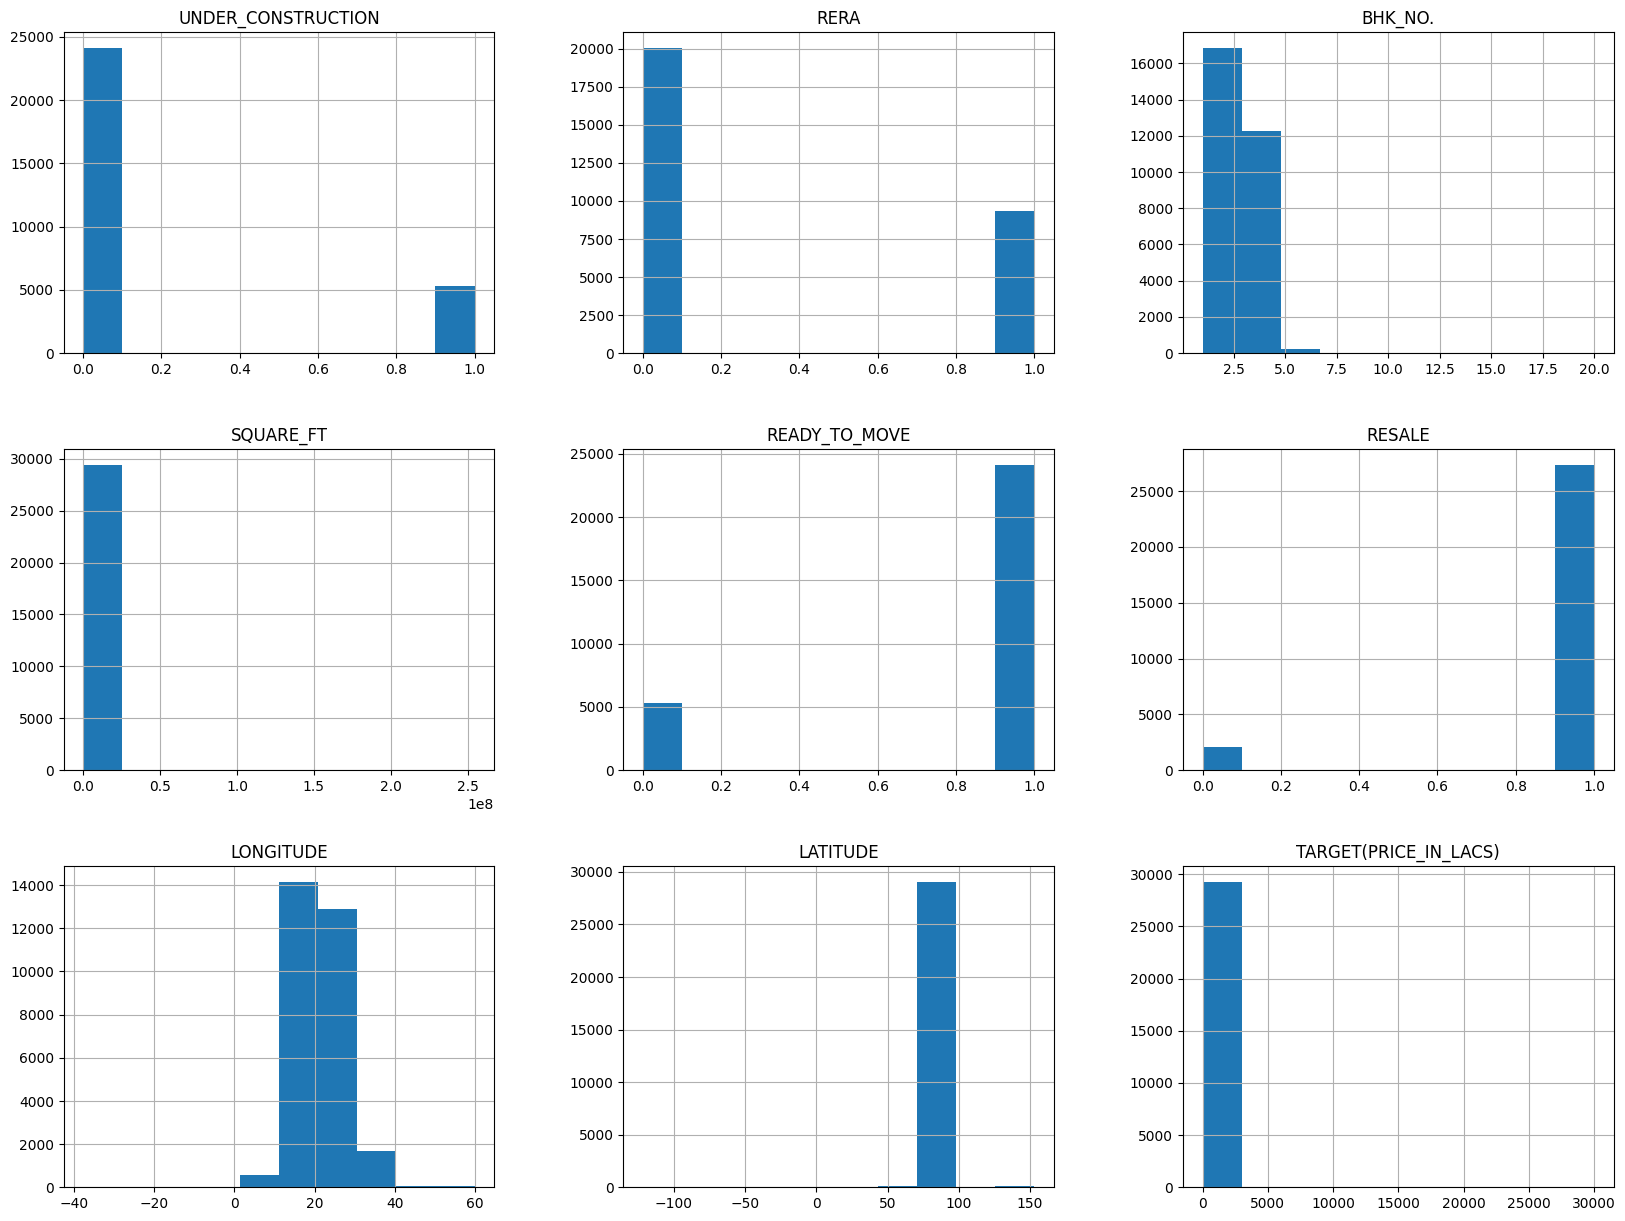

In [3]:

main_df.hist(figsize = (20,15))

In [4]:
cmpi=['UNDER_CONSTRUCTION','RERA' , 'BHK_NO.' , 'SQUARE_FT' , 'READY_TO_MOVE' , 'RESALE','LONGITUDE','LATITUDE' ,'TARGET(PRICE_IN_LACS)']
corr_matrix = main_df[cmpi].corr()
tempdf = main_df[cmpi]

In [5]:
corr_matrix['TARGET(PRICE_IN_LACS)'].sort_values(ascending = False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402687
BHK_NO.                  0.112198
RERA                     0.067711
UNDER_CONSTRUCTION       0.055556
LATITUDE                -0.017250
LONGITUDE               -0.031071
READY_TO_MOVE           -0.055556
RESALE                  -0.207916
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [6]:
tempdf['sqft_pr'] = tempdf['SQUARE_FT'] / tempdf['BHK_NO.']

C:\Users\Niraj N\AppData\Local\Temp\ipykernel_9184\862150482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['sqft_pr'] = tempdf['SQUARE_FT'] / tempdf['BHK_NO.']


In [7]:
tempdf

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),sqft_pr
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,650.118204
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,637.500000
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,466.579861
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,464.960571
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,499.504623
...,...,...,...,...,...,...,...,...,...,...
29422,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,833.333333
29423,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,384.615385
29424,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,511.320755
29425,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,463.539505


In [8]:
corr_matrix = tempdf.corr()

In [9]:
corr_matrix['TARGET(PRICE_IN_LACS)'].sort_values(ascending = False)

TARGET(PRICE_IN_LACS)    1.000000
sqft_pr                  0.414830
SQUARE_FT                0.402687
BHK_NO.                  0.112198
RERA                     0.067711
UNDER_CONSTRUCTION       0.055556
LATITUDE                -0.017250
LONGITUDE               -0.031071
READY_TO_MOVE           -0.055556
RESALE                  -0.207916
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
skew = ['READY_TO_MOVE','RESALE','UNDER_CONSTRUCTION','RERA']
shuf =  StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state=42)
for trindx , tstindx in shuf.split(tempdf,tempdf[skew]):
    df_train = tempdf.loc[trindx] 
    df_test = tempdf.loc[tstindx]

In [11]:
propertiesnum = ['UNDER_CONSTRUCTION','RERA' , 'BHK_NO.' , 'SQUARE_FT' , 'READY_TO_MOVE' , 'RESALE', 'sqft_pr']
x_train = df_train[propertiesnum]
y_train=df_train['TARGET(PRICE_IN_LACS)']
x_test = df_test[propertiesnum]
y_test = df_test['TARGET(PRICE_IN_LACS)']

In [12]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 1)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [13]:
pred = model.predict(x_train)
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(pred, y_train)

In [14]:
val_mae

7.276254039169633

In [15]:
pred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(pred, y_test)

In [16]:
val_mae


63.48548607580437

In [32]:
from sklearn.ensemble import RandomForestRegressor
maxl = [2000,1900 ,1875,1850]
bml = []
for i in maxl:
    deci = model = RandomForestRegressor(random_state = 1, max_leaf_nodes = i)
    deci.fit(x_train,y_train)
    pred = deci.predict(x_test)
    print(mean_absolute_error(pred, y_test))
    bml.append(mean_absolute_error(pred, y_test))
m = min(bml)
print("---",m)
q = bml.index(m)
print(q)
max_l_n = maxl[q]
max_l_n

57.95764387298294
57.94692171999589
57.9467859346432
57.955161052304554
--- 57.9467859346432
2


1875

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1,max_leaf_nodes = 1875)
forest_model.fit(x_train,y_train)
melb_preds = forest_model.predict(x_test)
print(mean_absolute_error(y_test, melb_preds))

57.9467859346432
